# Setup of a web-based Qiskit environment and running quantum circuits on simulators and real quantum computers

## Outline

1. Graphical IBM Circuit Composer
1. Setup Online Qiskit Environment
1. Execute Qiskit Circuit on Simulators
    * Visualise results (and create bell circuit)
    * visualise the circuit
    * connect to IBM Quantum Cloud services
    * use mock devices (noisy simulator)
1. Execute Qiskit Circuit on Real Quantum Computing Hardware

## Resources
1. IBM Circuit Composer: https://quantum.cloud.ibm.com/composer/
1. IBM Quantum Guides: https://quantum.cloud.ibm.com/docs/en/guides

## Step 1 Graphical IBM Circuit Composer

1. Create a free ID for https://quantum.cloud.ibm.com/
   * register at https://quantum.cloud.ibm.com/registration for a 30-day account without credit card
   * "sign in" at https://quantum.cloud.ibm.com/
   * create a quantum instance (with free Open Plan) at https://quantum.cloud.ibm.com/instances
     * in case of issues, check selected region (us-east) and try switching the account (menu is in upper right part of the screen
1. Open https://quantum.cloud.ibm.com/composer/
1. Explore the UI, including docs & tutorials (https://quantum.cloud.ibm.com/docs/en/guides/composer)
1. Create a Bell State (2 Qubits; H Gate, CNOT, Measurements)
1. Understand the results & visualisation
1. Execute the circuit on real hardware
   * use "Setup and run" in upper right corner of the UI (needs IBM Cloud account and "Quantum Instance witth Open Plan")
1. Understand the results
1. Generate Qiskit Code
   * View -> Panels -> Code Editor

## Step 2 Setup Online Qiskit Environment

Create online lab environment: 
https://quantum.cloud.ibm.com/docs/en/guides/online-lab-environments

1. qBraid (https://quantum.cloud.ibm.com/docs/en/guides/online-lab-environments#qbraid-lab)
   * Create an account http://account.qbraid.com
   * Launch Lab
   * Add Qiskit 1.2.0 environment (and choose this kernel in each notebook)
   * Create Launcher, Create Notebook “Python 3 / Qiskit 1.2.0”
   * List the qiskit modules with “%pip list | grep qiskit“
   * optionally upload notebook with "git clone"; https://github.com/JanLahmann/IBM-Quantum-Tutorials
1. Preconfigured Qiskit environment in mybinder.org: https://mybinder.org/v2/gh/JanLahmann/IBM-Quantum-Tutorials/HEAD?urlpath=%2Fdoc%2Ftree%2FHello-world.ipynb

## Step 3 Execute Qiskit Circuit on Simulators

1. visualise Results (for Bell circuit): https://quantum.cloud.ibm.com/docs/en/guides/visualize-results#plot-histogram-
    * do not execute “options when plotting a histogram”
    * adjust for using the Aer simulator instead of Qiskit Runtime (to avoid queuing times), see https://quantum.cloud.ibm.com/docs/en/guides/local-testing-mode#aersimulator-examples
1. visualise the Circuit https://quantum.cloud.ibm.com/docs/en/guides/visualize-circuits#alternative-renderers
1. modify for using the newer "SamplerV2" instead of the deprecated "Sampler"
1. Setup an IBM Quantum Channel (IQP), using the "New" IQP in IBM Public Cloud http://quantum.cloud.ibm.com:
    * https://eu-de.quantum.cloud.ibm.com/docs/en/guides/cloud-setup
    * choose region us-east (for Open Plan)
    * Create instance (if not done before)
    * Find your API key ("create API key" at https://quantum.cloud.ibm.com, or at https://cloud.ibm.com/iam/apikeys)
    * Find your Cloud Resource Name (CRN; at https://quantum.cloud.ibm.com/instances)
    * remember for your next notebooks to load your saved credentials with "service = QiskitRuntimeService()"
1. use fake backends (noisy simulator) https://quantum.cloud.ibm.com/docs/en/guides/local-testing-mode#fake-backends-example
    * Note: when using SamplerV2, need to change the plot_histogram to:
    * plot_histogram(result[0].data.meas.get_counts())

In [25]:
# visualise Results (for Bell circuit)

from qiskit_aer.primitives import SamplerV2 as Sampler
 
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
 
sampler = Sampler()

In [26]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()
 
# execute the quantum circuit
counts = sampler.run([bell]).result()[0].data.meas.get_counts()
print(counts)

{'11': 510, '00': 514}


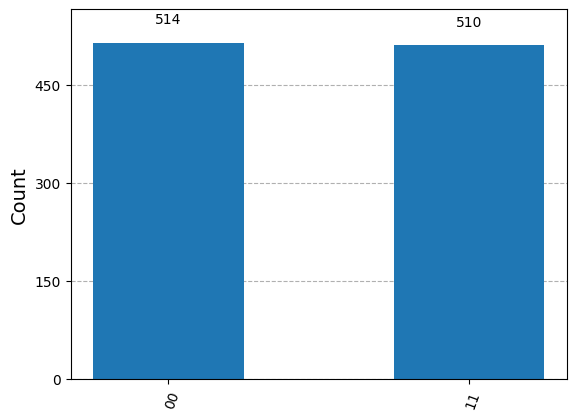

In [27]:
plot_histogram(counts)

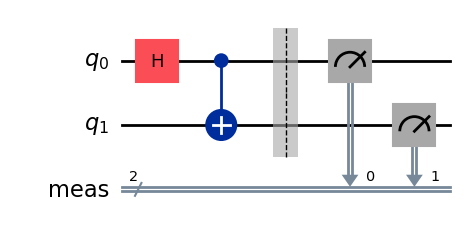

In [28]:
# visualise the circuit

bell.draw(output="mpl")

In [10]:
# get token from https://quantum.cloud.ibm.com ("Open Plan" is free to use)
token = "<YOUR_IBM_QUANTUM_APIkey>"
instance = "<YOUR_IBM_QUANTUM_CRN>"

In [30]:
# Setup an IBM Quantum Channel on "new" IQP
# get token from https://quantum.cloud.ibm.com ("Open Plan" is free to use)

from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(
    token=token, 
    instance=instance,
    overwrite=True,
    channel="ibm_cloud" # `channel` distinguishes between different account types
)

In [31]:
# Load saved credentials

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

In [ ]:
# use fake backends (noisy simulator)

from qiskit.circuit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Bell Circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
# Run the sampler job locally using FakeManilaV2
fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(qc)
 
# You can use a fixed seed to get fixed results.
sampler = Sampler(mode=fake_manila)
 
result = sampler.run([isa_qc]).result()

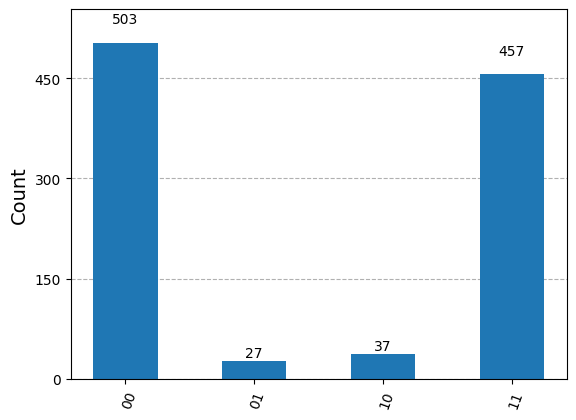

In [33]:
plot_histogram(result[0].data.meas.get_counts())

In [34]:
# option: print counts
print(result[0].data.meas.get_counts())

{'11': 457, '00': 503, '01': 27, '10': 37}


# Step 4 Execute Qiskit Circuit on Real Quantum Computing Hardware
1. See code in step 5 of https://quantum.cloud.ibm.com/docs/en/guides/cloud-setup#set-up-to-use-ibm-cloud and adjust slightly
2. See https://quantum.cloud.ibm.com/docs/en/guides/monitor-job how to monitor and retrieve jobs
    * see dashboard with your jobs: https://quantum.cloud.ibm.com
4. to avoid waiting for execution on real backend, results from previous jobs in QiskitRuntimeService can be retrieved with
   * job = service.job(PREVIOUS_JOB_ID)

In [35]:
# execute circuit on real hardware

# select least busy backend
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

job = sampler.run([isa_qc])
print(f"job id: {job.job_id()}")

job.status()

job id: d1pq2hv6d0hc73b8k2rg


'QUEUED'

In [36]:
job.status()

'DONE'

In [ ]:
# optional: retrieve previous job
job = service.job("PREVIOUS_JOB_ID")

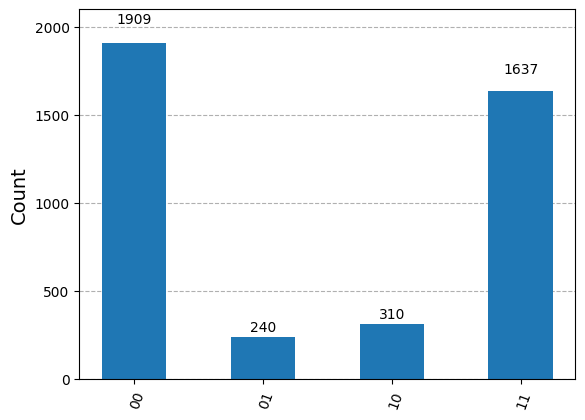

In [37]:
result = job.result()
plot_histogram(result[0].data.meas.get_counts())

# Further Reading

1. Tutorials and courses: https://quantum.cloud.ibm.com/learning/en
2. Coding with Qikit 1.x (YouTube series):
   * https://quantum.cloud.ibm.com/docs/en/tutorials/hello-world#hello-world
   * https://www.youtube.com/watch?v=oaAjxcIFLtM&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=1
   * https://github.com/derek-wang-ibm/coding-with-qiskit/tree/main
1. https://quantum.cloud.ibm.com/learning/en/courses/quantum-computing-in-practice,
   * https://www.youtube.com/watch?v=bChFW4Za3Ws&list=PLOFEBzvs-VvoZxe2ClFy27yOt6VzsTEJK
1. Exact Simulation with Primitives: https://quantum.cloud.ibm.com/docs/en/guides/simulate-with-qiskit-sdk-primitives
1. https://docs.quantum.ibm.com/guides/get-started-with-primitives#get-started-with-sampler
1. API reference: https://quantum.cloud.ibm.com/docs/en/api/qiskit
1. IBM Quantum Challenge 2024: https://github.com/qiskit-community/ibm-quantum-challenge-2024